In [183]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
np.random.seed(0)
num_al_samples = 5
epsilon = 800

In [279]:
def random_al(X):
    return np.random.choice(X.shape[0],num_al_samples, replace = False)

def first_al(X):
    return np.arange(0,num_al_samples)

In [318]:
def create_dataset():
    # Create a sample dataset
    X = np.expand_dims(np.sort(np.random.randint(0,100,size=(30))), axis = 1)
    Y = X**2 + np.random.uniform(-epsilon, epsilon, size = X.shape)
    return X,Y

def create_split(X,Y, al_alg):
    # split into train to get AL samples
    train_indices = al_alg(X)
    
    test_indices = np.setdiff1d(np.arange(X.shape[0]) ,train_indices)
    X_train, Y_train = X[train_indices], Y[train_indices]
    X_test, Y_test = X[test_indices], Y[test_indices]
    return X_train, Y_train, X_test, Y_test

In [281]:
def get_preds(X_train, Y_train, X_test):
    # Create linear regression object
    linear = linear_model.LinearRegression()
    quad = make_pipeline(PolynomialFeatures(2), linear_model.Ridge())

    # Set toy one
    linear.coef_ = np.array([[1.0]])
    linear.intercept_ = [3]

    # Make predictions using the testing set
    Y_pred_0 = linear.predict(X_test)
    # Make predictions using the testing set
    quad.fit(X_train,Y_train)
    Y_pred_quad = quad.predict(X_test)

    linear.fit(X_train,Y_train)
    Y_pred_linear = linear.predict(X_test)
    
    return Y_pred_0, Y_pred_linear, Y_pred_quad

In [282]:
def plot_preds(X_train, Y_train, X_test, Y_test, Y_pred, title):
    # Plot outputs
    plt.scatter(X_train, Y_train,  color='red', label = 'AL samples')
    plt.scatter(X_test, Y_test,  color='black', label = 'ground truth')
    plt.plot(X_test, Y_pred, color='blue', label = 'prediction')
    score = round(metrics.r2_score(Y_test, Y_pred),2)
    plt.legend()
    plt.title(title + ' : R^2 : {}'.format(score), fontsize=20)

In [334]:
X,Y = create_dataset()

In [357]:
np.random.seed(14893)
#np.random.seed(69158)
X_train, Y_train, X_test, Y_test = create_split(X,Y,random_al)
Y_pred_0, Y_pred_linear, Y_pred_quad = get_preds(X_train, Y_train, X_test)
metrics.r2_score(Y_test, Y_pred_quad), metrics.r2_score(Y_test, Y_pred_linear)

(0.9831448224603236, 0.7911559206541892)

In [338]:
quads, lins = {}, {}
for i in (np.random.randint(100000, size = 20)):
    np.random.seed(i)
    X_train, Y_train, X_test, Y_test = create_split(X,Y,random_al)
    Y_pred_0, Y_pred_linear, Y_pred_quad = get_preds(X_train, Y_train, X_test)
    quad_score = metrics.r2_score(Y_test, Y_pred_quad)
    lin_score = metrics.r2_score(Y_test, Y_pred_linear)
    quads[i] = quad_score
    lins[i] = lin_score

In [346]:
quads

{95920: 0.9572373102779221,
 84568: 0.9655150298421395,
 46586: 0.9692181134174414,
 14893: 0.9831448224603236,
 69279: 0.9876918606057743,
 23655: 0.962733554174892,
 70876: 0.9663535353381179,
 16215: 0.9847154520839284,
 69158: 0.9415512492327556,
 57336: 0.8708467043706205,
 34263: 0.9749589993689621,
 46173: 0.971849315579057,
 16627: 0.9734608590388998,
 11172: 0.9869170335063092,
 26103: 0.9774028933239675,
 33025: 0.9746972590960785,
 13111: 0.9808392562088966,
 4067: 0.9655168483045125,
 41470: 0.9268601597579627,
 97415: 0.9662158609959719}

In [344]:
q_vals = list(quads.values())
l_vals = list(lins.values())
for i in range(len(quads)):
    for j in range(i, len(quads)):
        q_diff = (q_vals[i] - q_vals[j])
        l_diff = (l_vals[i] - l_vals[j])
        if q_diff > 0 and l_diff < 0:
            print('Q',i,j, round(abs(q_diff),2), round(abs(l_diff),2))
        elif q_diff <0 and l_diff >0:
            print('L',i,j, round(abs(q_diff),2), round(abs(l_diff),2))

L 0 1 0.01 0.01
L 0 3 0.03 0.05
L 0 6 0.01 0.09
Q 0 8 0.02 0.06
L 0 15 0.02 0.05
L 0 19 0.01 0.06
L 1 3 0.02 0.04
Q 1 5 0.0 0.03
L 1 6 0.0 0.08
Q 1 8 0.02 0.07
L 1 15 0.01 0.05
L 1 19 0.0 0.05
L 2 3 0.01 0.08
Q 2 8 0.03 0.03
L 2 10 0.01 0.02
L 2 12 0.0 0.03
L 2 13 0.02 0.02
L 2 15 0.01 0.09
Q 2 17 0.0 0.02
Q 3 5 0.02 0.07
Q 3 8 0.04 0.11
Q 3 9 0.11 0.01
Q 3 10 0.01 0.06
Q 3 11 0.01 0.14
Q 3 12 0.01 0.05
Q 3 14 0.01 0.11
Q 3 16 0.0 0.11
Q 3 17 0.02 0.1
Q 3 18 0.06 0.02
Q 4 11 0.02 0.02
L 5 6 0.0 0.11
Q 5 8 0.02 0.04
L 5 10 0.01 0.01
L 5 12 0.01 0.02
L 5 13 0.02 0.01
L 5 15 0.01 0.08
L 5 19 0.0 0.08
Q 6 8 0.02 0.15
Q 6 9 0.1 0.05
Q 6 17 0.0 0.14
Q 6 18 0.04 0.06
Q 6 19 0.0 0.03
Q 7 8 0.04 0.0
Q 7 11 0.01 0.03
L 7 13 0.0 0.05
Q 7 14 0.01 0.0
Q 7 16 0.0 0.0
L 8 10 0.03 0.05
L 8 12 0.03 0.06
L 8 13 0.05 0.05
L 8 15 0.03 0.11
L 8 17 0.02 0.01
L 8 19 0.02 0.12
L 9 15 0.1 0.01
L 9 19 0.1 0.02
Q 10 11 0.0 0.07
L 10 13 0.01 0.0
Q 10 17 0.01 0.04
L 11 12 0.0 0.08
L 11 13 0.02 0.08
L 11 14 0.01 0.

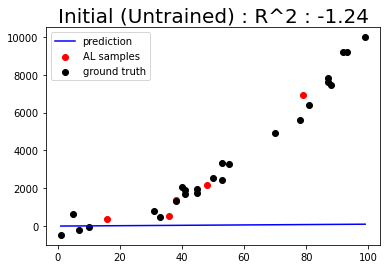

In [354]:
plot_preds(X_train,Y_train, X_test,Y_test, Y_pred_0, 'Initial (Untrained)')

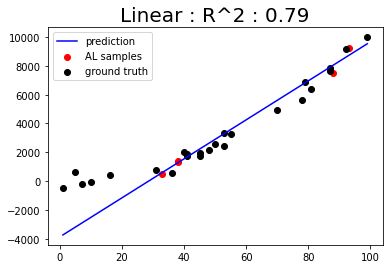

In [358]:
plot_preds(X_train,Y_train, X_test,Y_test, Y_pred_linear, 'Linear')

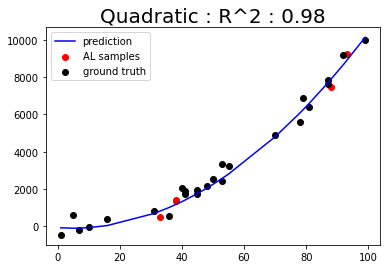

In [359]:
plot_preds(X_train,Y_train, X_test,Y_test, Y_pred_quad, 'Quadratic')